### Image segmentation: partitioning an image into multiple segments
- semantic segmentation: all the pixels that are part of the same object type get assigned to the same segment. 
    - e.g. in self-driving ar's vision system, all pixels that are part of a pedestrian's image might be assigned to the "pedestrian" segment (one segment would contain all the pedestrians)
- instance segmentation: all pixes that are part of the same individual object are assigne d tot he same segment
    - e.g. all pedestrians would have a diffrent segment
- color segmentation: pixels are assigned to the saem segment if they have a similar color
    - e.g. do color segmentation on satellite images to measure how much total forest area there is in a region

*convolutional neural networks (CNNs) build the the state of the art in semantic or instance segmentation*

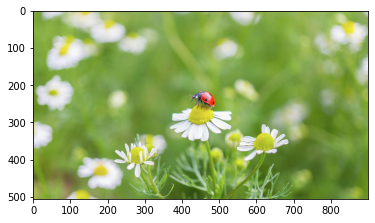

In [41]:
from matplotlib.pyplot import imshow
from matplotlib.image import imread
import os

image = imread(os.path.join("images", "ladybug_flower.jpeg"))
image.shape
imshow(image)

(height, width, number of color channels (RGB) between 0 and )

other types of channels:
- grayscale is one channel total
- alpha channel is an additional channel for transparency
- infrared is another one too

In [42]:
X = image.reshape(-1, 3)

In [43]:
from sklearn.cluster import KMeans

# no. of clusters is the number of colors
kmeans = KMeans(n_clusters=10).fit(X) # flatten array to get list of RGB colors ranging from 0 to 255
print(kmeans.labels_)
print(kmeans.cluster_centers_.shape)
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #.labels_ returns the cluster that each pixel belongs to. returns array of cluter centers of size len(kmeans.labels_)
segmented_img = segmented_img.reshape(image.shape) /255

[1 1 1 ... 9 9 9]
(10, 3)


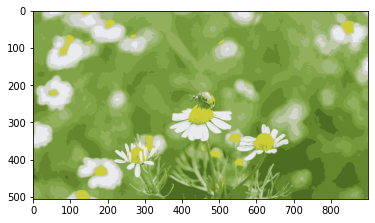

In [44]:
imshow(segmented_img)

code explained
- identify color clusters for all shades of colors
- computes the mean color of the pixel's color cluster
    - e.g. all shades of green may be replaced with the same light green color (if the mean color of the color cluster is light green)
- reshape it back to original color
- normalize the color channel values
- plot!

observations of plot:
- 10 and under color clusters doesn't let the ladybug keeps its red color
    - this is because **K-Means prefers clusters of similar sizes**. The ladybug's red is too small to get its own color cluster with such few color clusters